In [2]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clustering Jerarquico

En este ejemplo analizaremos los datos de ventas de una empresa. En la tabla tendremos información de clientes, cada fila consta con la información de clicks y compras realizados por cada uno

In [5]:
np.random.seed(1) # genera que siempre den igual los resultados
clicks = np.concatenate(
    (np.random.uniform(1,5,10),
     np.random.uniform(7,10,10),
     np.random.normal(3,1,10),
     np.random.normal(8.5,1,10))
).round(2)
compras = np.concatenate(
    (np.random.uniform(1,5,10),
     np.random.normal(3,1,10),
     np.random.uniform(7,10,10),
     np.random.normal(8.5,1,10))
).round(0)

data = pd.DataFrame(
    {
        "Clicks": (clicks*100).astype("int"),
        "Compras": compras.astype("int")
    }
)
data.head()

,Clicks,Compras
0,267,3
1,388,1
2,100,3
3,221,2
4,159,3


1. Graficar datos en scatterplot

<Axes: xlabel='Clicks', ylabel='Compras'>

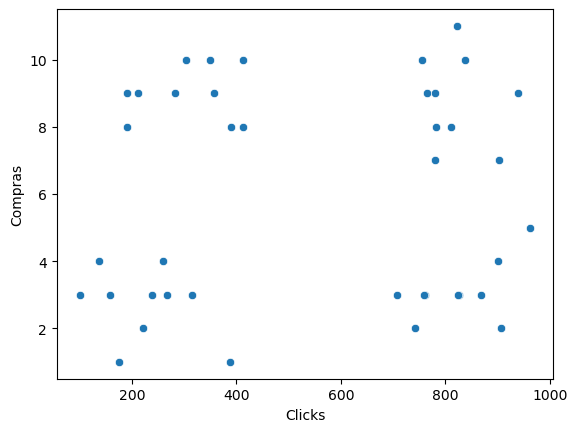

In [7]:
sns.scatterplot(data = data, x="Clicks", y="Compras")

2. Normalizar la data

In [9]:
data = (data-data.min())/(data.max()-data.min())
data.head()

,Clicks,Compras
0,0.193511,0.2
1,0.333720,0.0
2,0.000000,0.2
3,0.140209,0.1
4,0.068366,0.2


3. Graficar nuevamente los datos, ¿nota algún cambio?

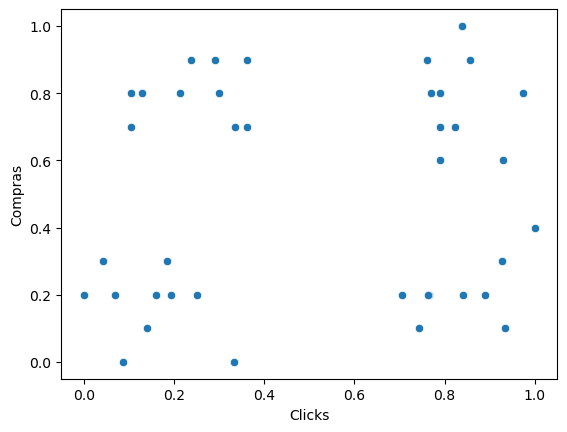

In [11]:
sns.scatterplot(data = data, x="Clicks", y="Compras")
plt.show()

4. Graficar dendograma con el método del centroide utilizando la distancia euclidea

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

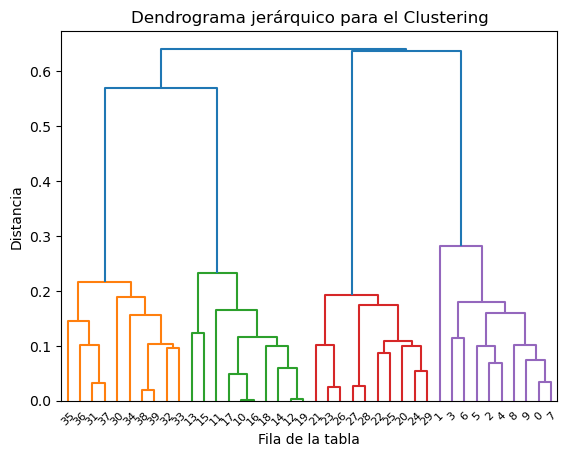

In [14]:
Z = linkage(
    data, 
    method = "centroid",
    metric = "euclidean" # usa la distancia euclidea
)
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("Fila de la tabla")
plt.ylabel("Distancia")
dendrogram(Z)
plt.show()

5. Calcular coeficiente de Cophonet

In [16]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [17]:
distancia_original = pdist(data)

c, coph_dist = cophenet(Z, distancia_original)
c

0.8431017857229921

6. Determinar número de clusters con el método del codo

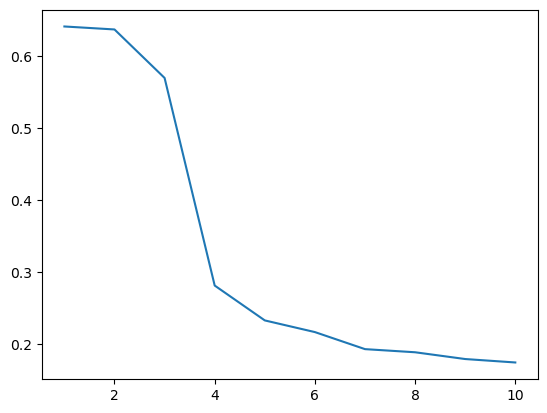

In [19]:
last = Z[-10:,2] # me interesa únicamente la columna de distancias (la 2)
last_rev = last[::-1]
plt.plot(
    range(1, len(last)+1),
    last_rev
)

In [20]:
# Es un caso interesante ya que vemos que hay dos codos. El primero es en 3 clusters 
# y el segundo en 5 clusters. La cantidad a elegir real dependera del análisis de negocio

7. Generar 3 clusters y mostrar el resultado en un dendograma con la linea horizontal mostrando la línea de corte. También mostrar un scatterplot con los clusters

In [22]:
from scipy.cluster.hierarchy import fcluster

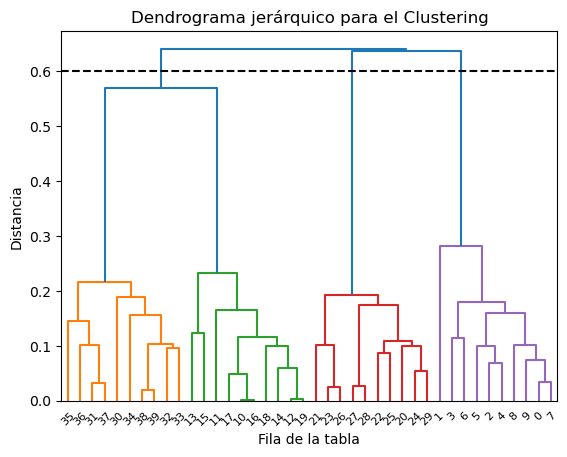

In [23]:
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("Fila de la tabla")
plt.ylabel("Distancia")
dendrogram(Z)

plt.hlines(0.6,0,1000, color = "black", ls = "--")

plt.show()

In [24]:
max_d=0.6
clusters = fcluster(Z, max_d, criterion="distance")
data["cluster"] = clusters

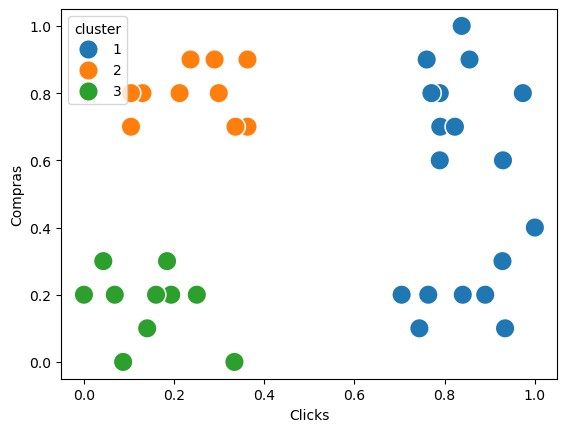

In [25]:
sns.scatterplot(
    data = data,
    x = "Clicks", 
    y = "Compras", 
    s = 200,
    hue = "cluster",
    palette = "tab10"
)
plt.show()

8. Idem 7 con 4 clusters

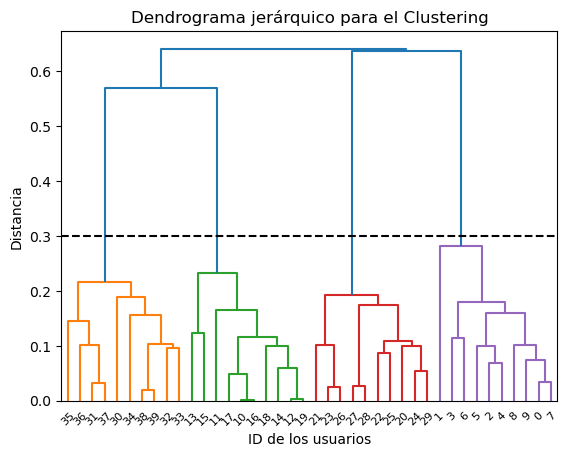

In [27]:
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z)

plt.hlines(0.3,0,1000, color = "black", ls = "--")

plt.show()

In [28]:
max_d=0.3
clusters = fcluster(Z, max_d, criterion="distance")
data["cluster"] = clusters

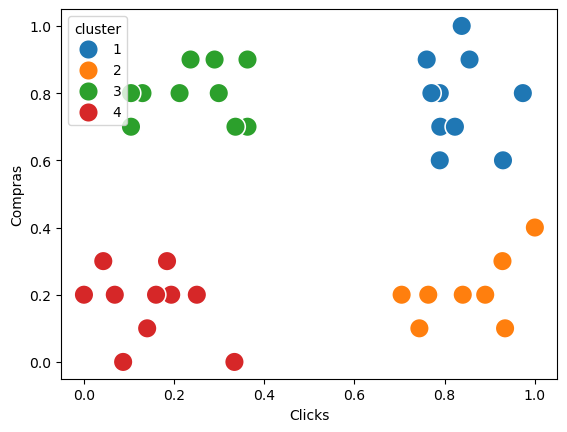

In [29]:
sns.scatterplot(
    data = data,
    x = "Clicks", 
    y = "Compras", 
    s = 200,
    hue = "cluster",
    palette = "tab10"
)
plt.show()

9. Idem 7 con 5 clusters

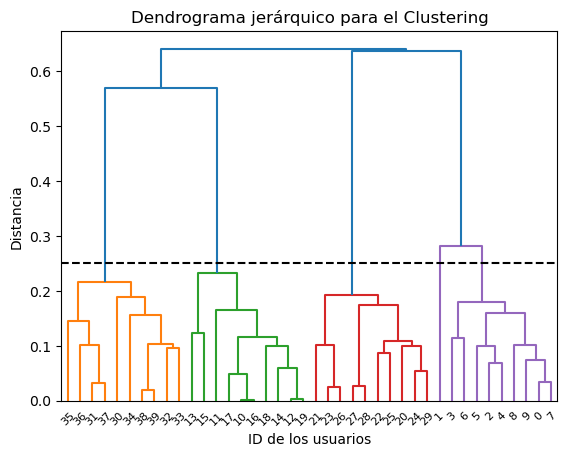

In [31]:
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z)

plt.hlines(0.25,0,1000, color = "black", ls = "--")

plt.show()

In [32]:
max_d=0.25
clusters = fcluster(Z, max_d, criterion="distance")
data["cluster"] = clusters

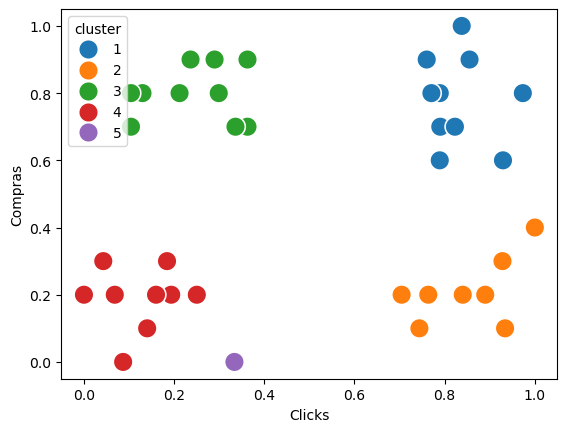

In [33]:
sns.scatterplot(
    data = data,
    x = "Clicks", 
    y = "Compras", 
    s = 200,
    hue = "cluster",
    palette = "tab10"
)
plt.show()

10. Idem 7 con 4 clusters utilizando el método de la distancia euclídea en vez de la distancia mínima

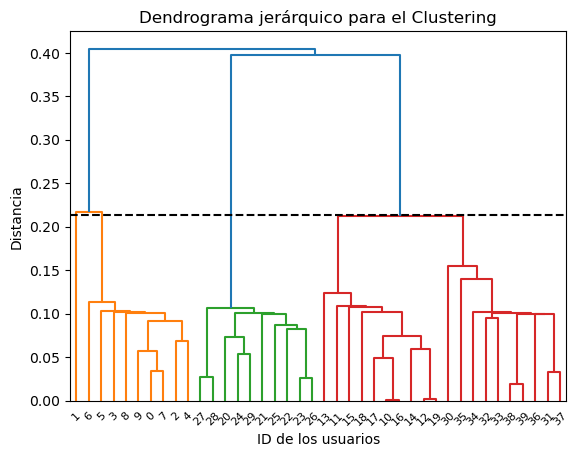

In [35]:
data = data.drop("cluster", axis = 1) # elimino la columna cluster del modelo para que no sea tenido en cuenta en esta nueva clusterización
Z = linkage(
    data, 
    method = "single",
    metric = "euclidean" # usa la distancia euclidea
)
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z)

plt.hlines(0.213, 0, 1000, color = "black", ls = "--")

plt.show()

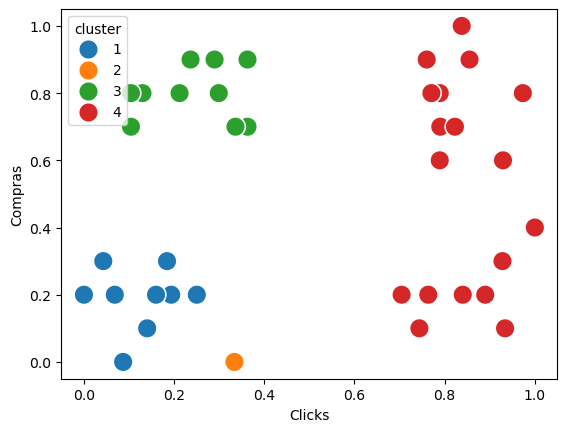

In [36]:
max_d=0.213
clusters = fcluster(Z, max_d, criterion="distance")
data["cluster"] = clusters
sns.scatterplot(
    data = data,
    x = "Clicks", 
    y = "Compras", 
    s = 200,
    hue = "cluster",
    palette = "tab10"
)
plt.show()

In [37]:
data.head()

,Clicks,Compras,cluster
0,0.193511,0.2,1
1,0.333720,0.0,2
2,0.000000,0.2,1
3,0.140209,0.1,1
4,0.068366,0.2,1
